In [2]:
from agentlab.experiments.exp_utils import RESULTS_DIR
from agentlab.analyze import inspect_results
from agentlab.experiments.study import get_most_recent_study

/Users/alexandre.lacoste/dev/AgentLab/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load results
find the most recent study and load all summary information in a result dataframe

In [3]:
# replace this by your desired directory if needed.
result_dir = get_most_recent_study(RESULTS_DIR, contains=None)

print(result_dir)
result_df = inspect_results.load_result_df(result_dir)

/Users/alexandre.lacoste/agentlab_results/2025-07-18_11-39-51_tooluse-gpt-4-1-on-workarena-l1-custom


Loading results: 100%|██████████| 4/4 [00:00<00:00,  7.32it/s]


In [ ]:
report = inspect_results.global_report(result_df)
inspect_results.display_report(report)

Found multiple configuration, averaging across tasks and returning a per-agent report.


,agent.agent name,env.benchmark,avg reward,std err,avg steps,n completed,n err,cum effective cost
0,ToolUse-gpt-4.1,workarena,0.25,0.217,31.25,4/4,0,8.6052


### Print error report if any

In [7]:
inspect_results.error_report(result_df, max_stack_trace=2, use_log=True)

''

### Load steps of one episode

### Inspect the keys in the result dataframe

In [12]:
for key in result_df.keys():
    print(key)

index
exp_dir
agent.model.model_name
agent.model.max_total_tokens
agent.model.max_input_tokens
agent.model.max_new_tokens
agent.model.temperature
agent.model.vision_support
agent.model.log_probs
agent.config.tag_screenshot
agent.config.goal.goal_as_system_msg
agent.config.obs.use_last_error
agent.config.obs.use_screenshot
agent.config.obs.use_axtree
agent.config.obs.use_dom
agent.config.obs.use_som
agent.config.obs.use_tabs
agent.config.obs.use_zoomed_webpage
agent.config.obs.skip_preprocessing
agent.config.summarizer.do_summary
agent.config.summarizer.high_details
agent.config.general_hints.use_hints
agent.config.task_hint.use_task_hint
agent.config.task_hint.hint_db_rel_path
agent.config.keep_last_n_obs
agent.config.multiaction
agent.config.action_subsets
agent.use_raw_page_output
agent.action_set
env.task_seed
env.max_steps
env.headless
env.record_video
env.wait_for_user_message
env.viewport
env.slow_mo
env.storage_state
env.task_kwargs
env.pre_observation_delay
exp_name
enable_debu

action: click(bid='a205')
reward: 0
AXTree: RootWebArea 'New Record | Hardware | ServiceNow'
	[47] generic, live='assertive', atomic, relevant='additions text'
	[48] generic, live='polite', atomic, relevant='additions text'
	[53] generic, live='polite', atomic, relevant='all'
	[56] navigation 'Global skip links'
		[57] link 'Skip to main content'
		[58] link 'Open accessibility preferences'
	[60] region 'There are 0 announcements displayed', live='polite', relevant='additions text'
	[61] generic, live='polite', atomic, relevant='additions
screenshot type: <class 'numpy.ndarray'>


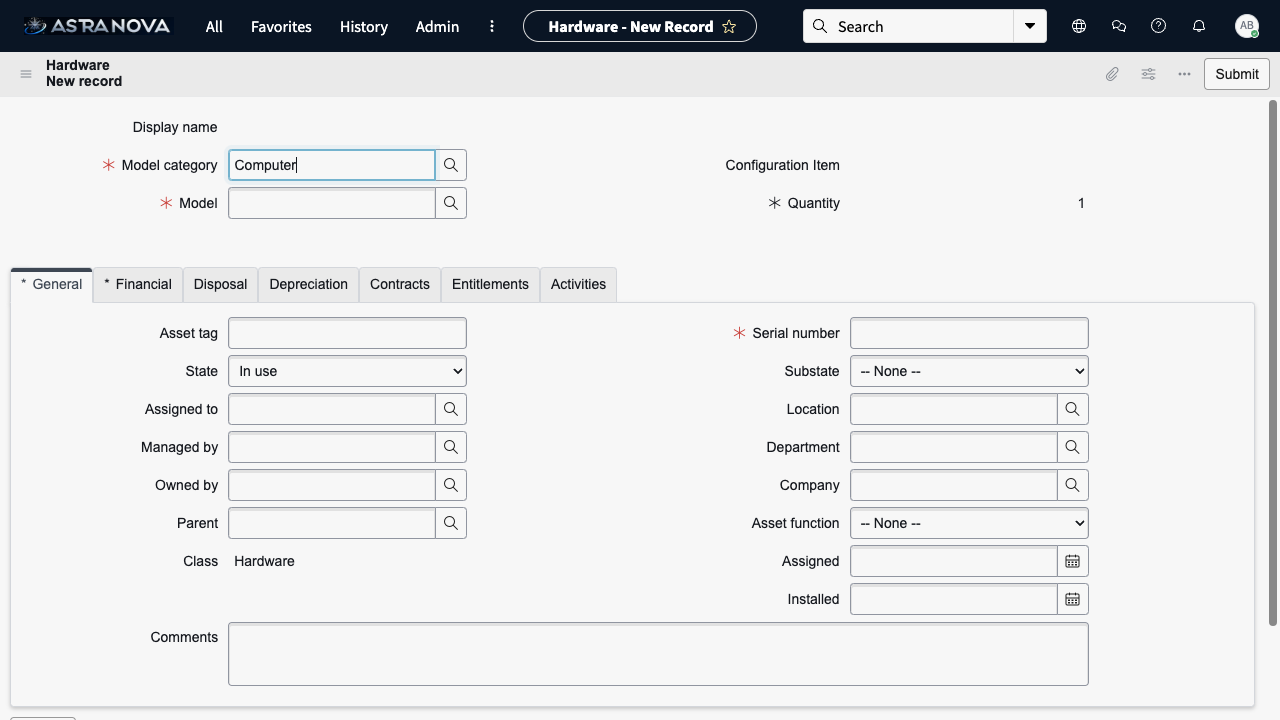

In [51]:
from agentlab.experiments.loop import ExpResult

# lazy loader for all the information of on experiment (1 agent on 1 task)
result = ExpResult(result_df.iloc[0].exp_dir)

episode = result.steps_info
print(f"action: {episode[1].action}")
print(f"reward: {episode[1].reward}")
print(f"AXTree: {episode[1].obs['axtree_txt'][:500]}")

# formatted as an array
print(f"screenshot type: {type(episode[1].obs['screenshot'])}")

# loading from png
display(result.get_screenshot(1))

In [ ]:
import json

print(f"Obs Keys:\n  {'\n  '.join(list(episode[1].obs.keys()))}")
extra_properties = json.dumps(episode[1].obs["extra_element_properties"]["60"], indent=2)

print(f"\nExtra Element Properties bid=60:\n{extra_properties}")

Obs Keys:
  chat_messages
  goal
  goal_object
  open_pages_urls
  open_pages_titles
  active_page_index
  url
  dom_object
  axtree_object
  extra_element_properties
  focused_element_bid
  last_action
  last_action_error
  elapsed_time
  axtree_txt
  screenshot

Extra Element Properties:
{
  "visibility": 1.0,
  "bbox": [
    0.0,
    0.0,
    1280.0,
    0.0
  ],
  "clickable": false,
  "set_of_marks": false
}
